<a href="https://colab.research.google.com/github/OlgaPliuta/Python_Openedu/blob/master/Intro_to_ML_Stepik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np

In [46]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [47]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [48]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [49]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [50]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [51]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [52]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [53]:
events_data['day'] = events_data.date.dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


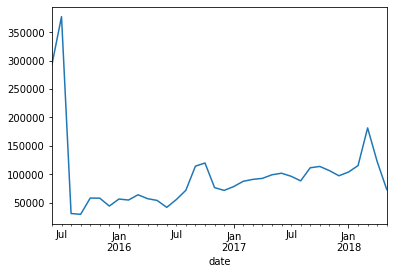

In [54]:
events_data.index = events_data['date']
events_data['action'].resample('M').count().plot()

In [55]:
events_data.groupby('day').user_id.nunique()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

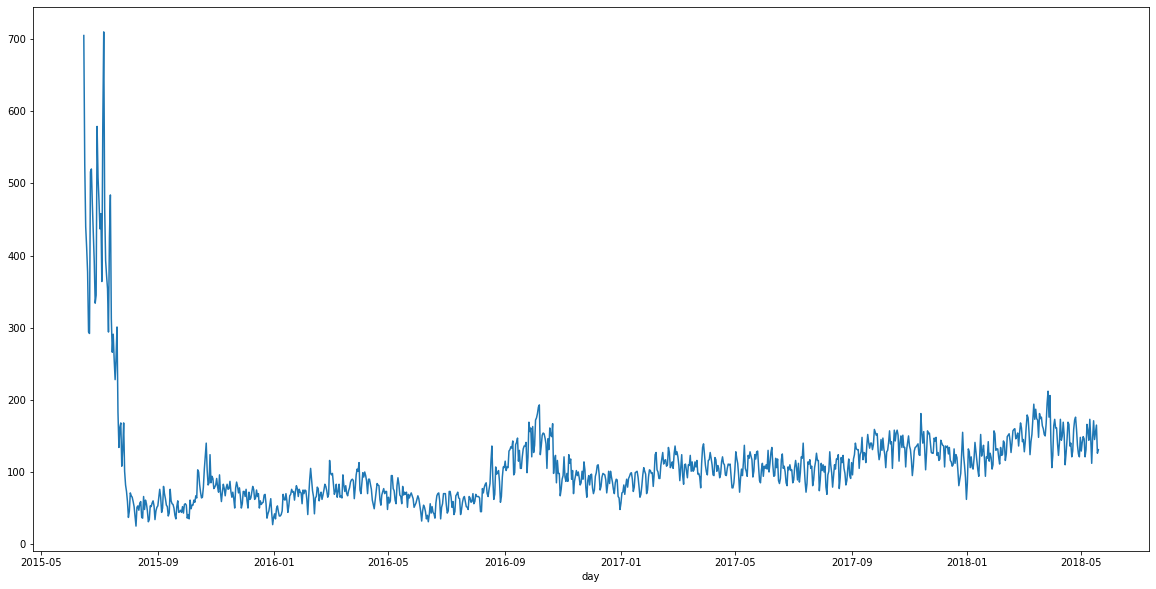

In [56]:
events_data.groupby('day').user_id.nunique().plot(figsize = (20, 10))

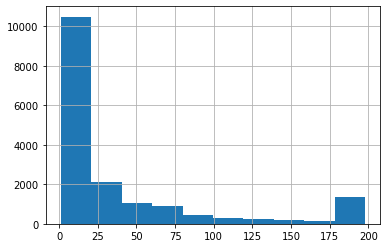

In [57]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index = False).agg({'step_id' : 'count'}).rename(columns = {'step_id' : 'passed_steps'}).passed_steps.hist()

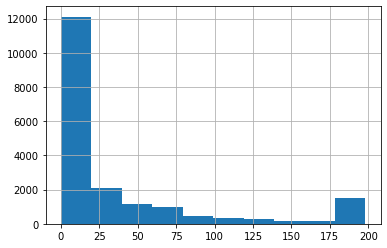

In [58]:
events_data.pivot_table(index = 'user_id', columns = 'action', values = 'step_id', aggfunc = 'count', fill_value=0).reset_index().discovered.hist()

In [59]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [60]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [61]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [62]:
users_scores = submissions_data.pivot_table(index = 'user_id', columns = 'submission_status', values = 'step_id', aggfunc = 'count', fill_value=0).reset_index()

In [63]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [64]:
gap_data = events_data[['user_id' , 'day', 'timestamp']].drop_duplicates(subset=['user_id' , 'day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).values
gap_data

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int64)], dtype=object)

In [65]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))


In [69]:
gap_data = gap_data / (24*60*60)

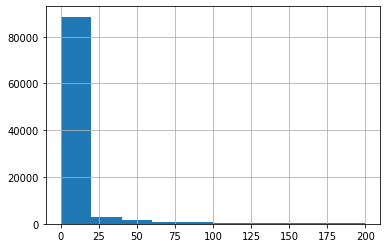

In [70]:
gap_data[gap_data < 200].hist()

In [71]:
gap_data.quantile(0.95)

59.760440972222156

In [72]:
events_data.sort_values('timestamp')

,step_id,timestamp,action,user_id,date,day
date,,,,,,
2015-06-15 04:00:48,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
2015-06-15 04:00:48,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2015-06-15 04:00:48,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
2015-06-15 04:01:35,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
2015-06-15 04:01:35,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
2018-05-19 23:31:25,33375,1526772685,passed,11677,2018-05-19 23:31:25,2018-05-19
2018-05-19 23:32:30,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
2018-05-19 23:32:30,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [73]:
users_scores.sort_values('correct', ascending=False)

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42
...,...,...,...
551,1321,0,2
9778,26349,0,1
3559,9422,0,1
5014,13408,0,2


In [76]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})
users_data

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [75]:
30*24*60*60

2592000

In [81]:
now = 1520978742
drop_out_threshold = 2592000

In [84]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [85]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,False
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,False
